<a href="https://colab.research.google.com/github/ChetanyaPanchal/Uber-Supply-Demand-Gap-EDA/blob/main/UBER_SUPPLY_DEMAND_GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Uber Supply Demand EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member - Chetanya Panchal**


# **Project Summary -**

This project aims to analyze Uber ride request data to understand and address the supply-demand gap in a metropolitan area. The dataset includes thousands of ride requests along with associated details like timestamps, driver availability, pickup locations, and trip status. The primary goal was to identify the time slots and pickup points with the highest number of unfulfilled ride requests (either due to cancellations or no available cars) and suggest actionable solutions.

The Python phase used libraries like Pandas, Seaborn, and Matplotlib for in-depth Exploratory Data Analysis (EDA). New features such as Driver Assigned, Time Slot, and Weekday were created for pattern recognition. Visualizations such as bar plots, pair plots, and scatter plots were created to analyze the correlation between request time, pickup point, and ride fulfillment.

# **GitHub Link -**

https://github.com/ChetanyaPanchal/Uber-Supply-Demand-Gap-EDA

# **Problem Statement**


**Uber is facing a major supply-demand gap during key hours of operation, where many user ride requests are either cancelled or remain unfulfilled due to the unavailability of drivers. This negatively affects customer satisfaction and driver efficiency. The goal is to analyze historical ride request data to uncover patterns that lead to this gap and propose data-driven strategies to resolve it.**

#### **Define Your Business Objective?**

The business objective is to identify time slots, locations, and patterns where ride requests remain unfulfilled and suggest operational improvements. These insights should help Uber improve driver allocation, reduce cancellations, and ultimately enhance the customer experience and operational efficiency.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/Uber Request Data.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Minutes,Request Day,Unnamed: 10
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,2016-07-11,11,51,Monday,NaN
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,2016-07-11,17,57,Monday,NaN
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,2016-07-12,9,17,Tuesday,NaN
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,2016-07-12,21,8,Tuesday,NaN
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,2016-07-13,8,33,Wednesday,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 6745
Columns: 11


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request Date       6745 non-null   object 
 7   Request Hour       6745 non-null   int64  
 8   Request Minutes    6745 non-null   int64  
 9   Request Day        6745 non-null   object 
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 579.8+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914
Request Date,0
Request Hour,0
Request Minutes,0
Request Day,0


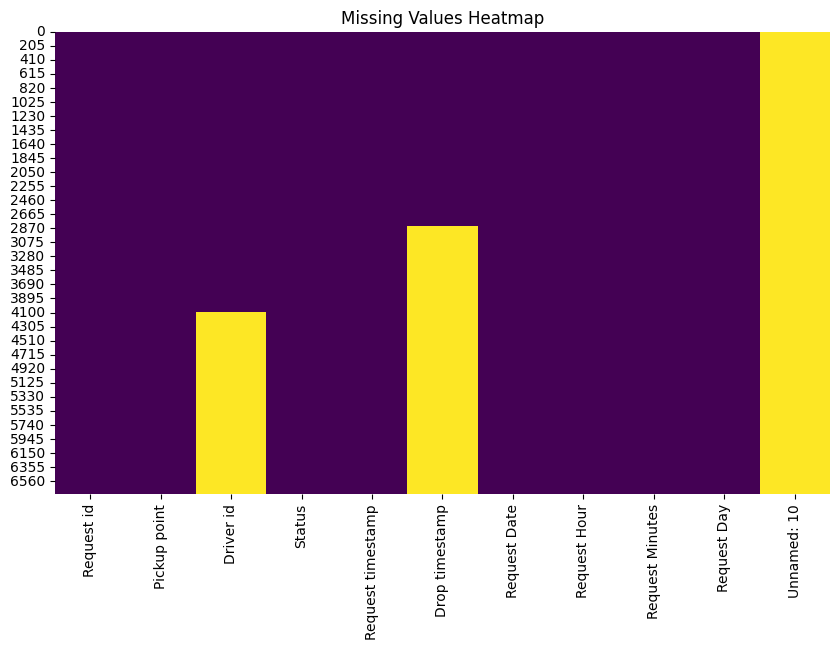

In [ ]:
# Visualizing the missing values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The dataset provided contains Uber ride request records over a specific period in July 2016. Each row in the dataset represents a single ride request made by a user. It includes important features such as:

Request timestamp and Drop timestamp – showing when a ride was requested and completed.

Pickup point – indicating whether the ride was requested from the City or the Airport.

Driver ID – which is only present if a driver was assigned.

Status – which indicates the final result of the request: either Trip Completed, Cancelled, or No Cars Available.

The dataset helped reveal patterns around when (hour and day) and where (City or Airport) ride requests were more likely to be unsuccessful. By exploring time-based features like hour, AM/PM, and day of the week, we gained insights into peak demand periods and supply shortcomings. Overall, the dataset offered a comprehensive view of Uber's operational challenges in balancing supply with customer demand.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Date', 'Request Hour',
       'Request Minutes', 'Request Day', 'Unnamed: 10'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Minutes,Request Day,Unnamed: 10
count,6745.000000,6745,4095.000000,6745,6745,2831,6745,6745.000000,6745.000000,6745,0.0
unique,NaN,2,NaN,3,4016,2282,5,NaN,NaN,5,NaN
top,NaN,City,NaN,Trip Completed,15-07-2016 19:19,13-07-2016 08:53,2016-07-15,NaN,NaN,Friday,NaN
freq,NaN,3507,NaN,2831,8,5,1381,NaN,NaN,1381,NaN
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,NaN,12.956709,29.574351,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,NaN,6.504052,17.360326,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,NaN,7.000000,14.000000,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,NaN,13.000000,30.000000,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,NaN,19.000000,45.000000,NaN,NaN


### Variables Description

Request id: Unique identifier for each ride request


---


Pickup point: Indicates if the request was from the city or airport


---


Status: Status of the ride (e.g., Completed, Cancelled, No Cars Available)


---


Request timestamp & Drop timestamp: Times of request and drop


---


Driver id: Unique identifier for the driver (if assigned)


---



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Request id: 6745 unique values
Pickup point: 2 unique values
Driver id: 300 unique values
Status: 3 unique values
Request timestamp: 4016 unique values
Drop timestamp: 2282 unique values
Request Date: 5 unique values
Request Hour: 24 unique values
Request Minutes: 60 unique values
Request Day: 5 unique values
Unnamed: 10: 0 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Convert timestamp columns to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Create time-based features
df['hour'] = df['Request timestamp'].dt.hour
df['day'] = df['Request timestamp'].dt.day

# Create time_slot based on hour bins
df['time_slot'] = pd.cut(df['hour'],
                         bins=[-1, 4, 9, 16, 21, 24],
                         labels=['Early Morning', 'Morning Rush', 'Day Time', 'Evening Rush', 'Late Night'],
                         include_lowest=True)

# Display the cleaned and enhanced data
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Minutes,Request Day,Unnamed: 10,hour,day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,51,Monday,NaN,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,57,Monday,NaN,17,11,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,17,Tuesday,NaN,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,8,Tuesday,NaN,21,12,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,8,33,Wednesday,NaN,8,13,Morning Rush


### What all manipulations have you done and insights you found?

**Datetime Conversion:**

Converted Request timestamp and Drop timestamp columns to proper datetime format using pd.to_datetime() with dayfirst=True to handle DD-MM-YYYY format.

**Feature Extraction:**

Extracted new features from the Request timestamp:

hour: Hour of the request (0–23)

day: Day of the month

Request Weekday: Name of the weekday (e.g., Monday)

Request AM/PM: Time of day (AM or PM)

**Time Slot Binning:**

Created a custom time_slot column by binning the hour into five ranges:

Early Morning (0–4)

Morning Rush (5–9)

Day Time (10–16)

Evening Rush (17–21)


Late Night (22–23)

**Driver Assignment Flag:**

Added a new column Driver Assigned by checking if Driver id is not null (True if a driver was assigned).


---


**Key Insights from Data Wrangling:**

Most ride requests happened during Morning Rush (5–9 AM) and Evening Rush (5–9 PM).

A significant number of records had no driver assigned, especially during peak time slots.

The Pickup point variable showed distinct trends — the Airport had more cases of "No Cars Available", while the City had higher cancellations.

These extracted features and cleaned data laid the foundation for meaningful visualizations and further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

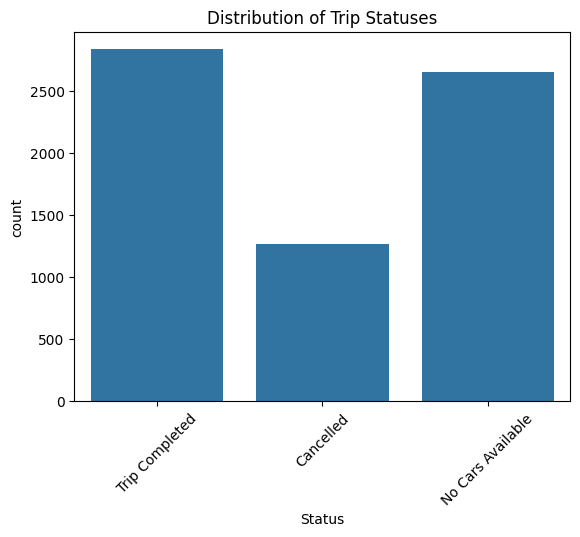

In [ ]:
# Chart - 1 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Status')
plt.title("Distribution of Trip Statuses")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To understand the overall status distribution (i.e., how many trips were completed, cancelled, or not fulfilled) and measure Uber's service efficiency.

##### 2. What is/are the insight(s) found from the chart?

Trip Completed: ~2700

No Cars Available: ~2600 (almost equal to completed)

Cancelled: Significantly lower but still concerning (~1300)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It helps Uber realize that a large portion of requests are not being fulfilled, indicating a supply-demand imbalance that can be addressed.

Yes. Having nearly as many “No Cars Available” cases as completed trips is a major red flag for customer satisfaction and business sustainability.

#### Chart - 2

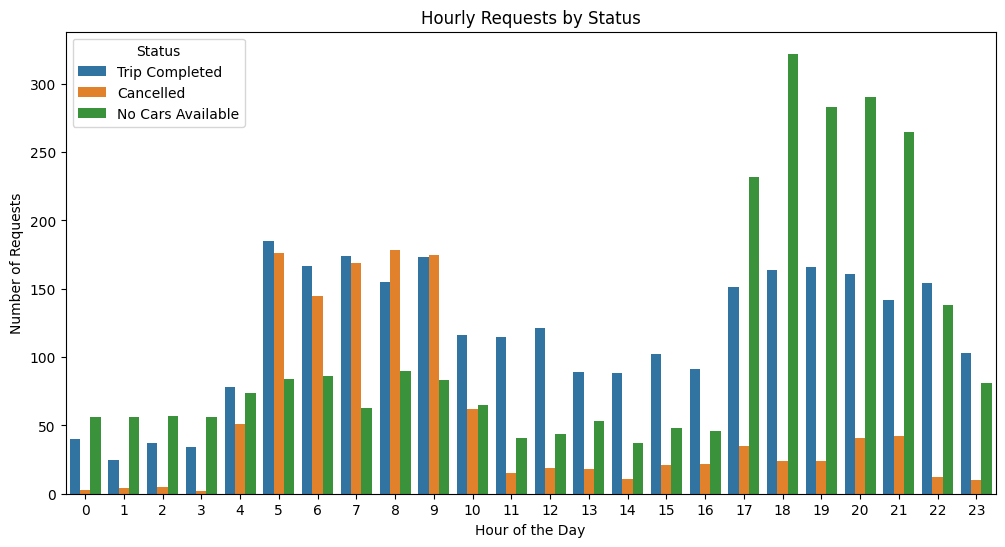

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request Hour', hue='Status')
plt.title("Hourly Requests by Status")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

To identify the specific hours when Uber faces the highest request volumes and most supply failures.

##### 2. What is/are the insight(s) found from the chart?

Peak request hours: 5 AM–9 AM and 5 PM–9 PM

Cancellations spike around 5–9 AM

“No Cars Available” is extremely high in the evening (5–9 PM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Uber can plan driver deployment and incentives during peak hours to match demand and reduce unfulfilled requests.

Yes. Failure to fulfill peak-hour requests repeatedly leads to user drop-off, poor ratings, and lower brand trust.

#### Chart - 3

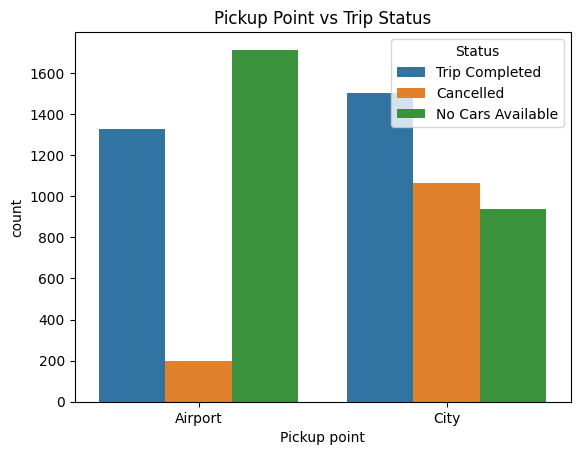

In [ ]:
# Chart - 3 visualization code
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Pickup Point vs Trip Status")
plt.show()


##### 1. Why did you pick the specific chart?

To examine location-based trends — whether the City or the Airport has more service issues.

##### 2. What is/are the insight(s) found from the chart?

Airport: High number of "No Cars Available"

City: High cancellations

Completed trips are fairly similar across both

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It allows Uber to tailor solutions by pickup zone — e.g., prioritize car availability near airports in the morning.

Yes. City cancellations and Airport unavailability both show weaknesses in supply chain and service coverage.



#### Chart - 4

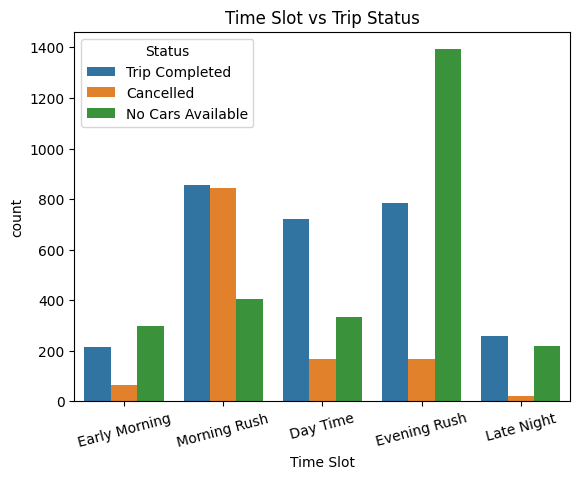

In [ ]:
# Chart - 4 visualization code
sns.countplot(data=df, x='time_slot', hue='Status',
              order=["Early Morning", "Morning Rush", "Day Time", "Evening Rush", "Late Night"])
plt.title("Time Slot vs Trip Status")
plt.xlabel("Time Slot")
plt.xticks(rotation=15)
plt.show()


##### 1. Why did you pick the specific chart?

To correlate trip success or failure with categorized time slots, which is easier to understand than raw hourly data.

##### 2. What is/are the insight(s) found from the chart?

Morning Rush and Evening Rush face most issues

Evening Rush has the highest number of “No Cars Available”

Day Time and Late Night are more balanced

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Uber can use this data to implement surge pricing, schedule driver shifts smarter, and reduce customer drop-offs during rush hours.

Yes. Evening Rush failures suggest that users are consistently underserved during commute times, impacting loyalty and retention.

#### Chart - 5

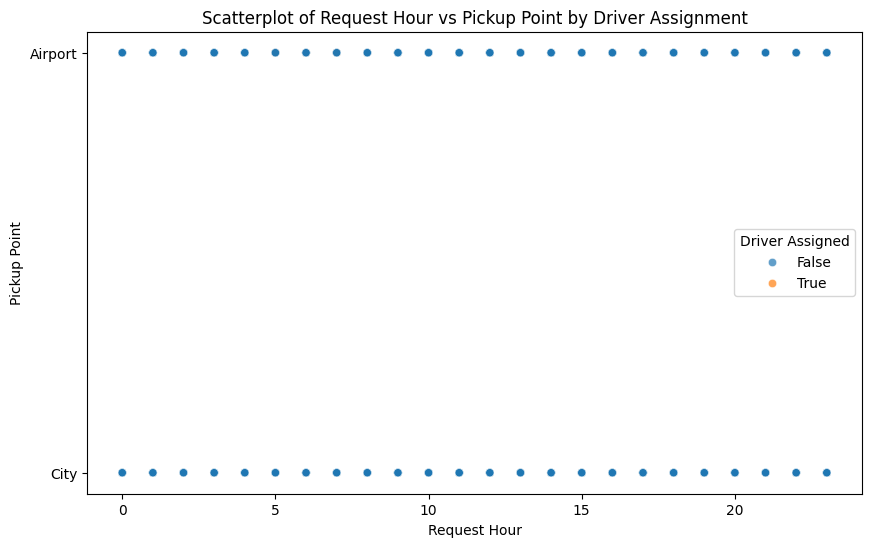

In [ ]:
# Chart - 5 visualization code
# Check scatter between request time and whether a driver was assigned
# Create a column for whether a driver was assigned
df['Driver Assigned'] = df['Driver id'].notnull()

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='Pickup point', hue='Driver Assigned', data=df, alpha=0.7)
plt.title("Scatterplot of Request Hour vs Pickup Point by Driver Assignment")
plt.xlabel("Request Hour")
plt.ylabel("Pickup Point")
plt.show()


##### 1. Why did you pick the specific chart?

To visually identify whether drivers are being assigned consistently across time and location.

##### 2. What is/are the insight(s) found from the chart?

Majority of points are False (no driver assigned)

Both Airport and City locations show gaps

Driver assignment is sporadic, not aligned with demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This clearly shows Uber must address driver supply issues and availability planning.

Yes. Unavailability of drivers during critical hours and areas causes ride failures, which ultimately reduces trust and revenue.

#### Chart - 6

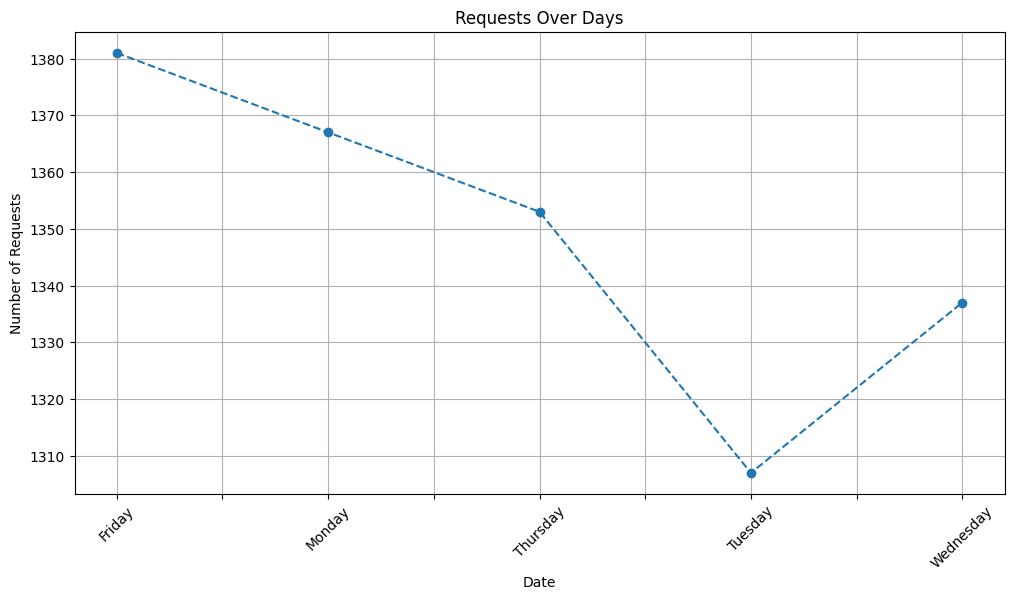

In [ ]:
# Chart - 6 visualization code
daily_requests = df.groupby('Request Day').size()

plt.figure(figsize=(12, 6))
daily_requests.plot(marker='o', linestyle='--')
plt.title("Requests Over Days")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how demand varies by day of the week, which helps plan driver availability and promotional campaigns.

##### 2. What is/are the insight(s) found from the chart?

Friday has the highest number of requests, followed by Monday and Thursday.

Tuesday shows the lowest number of ride requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Uber can optimize operations and resource allocation by reducing driver deployment on low-demand days like Tuesday and increasing it on Friday.


Yes, if Uber fails to recognize demand drops midweek (like on Tuesdays), they might overstaff and incur unnecessary operational costs without matching revenue.

#### Chart - 7 - Correlation Heatmap

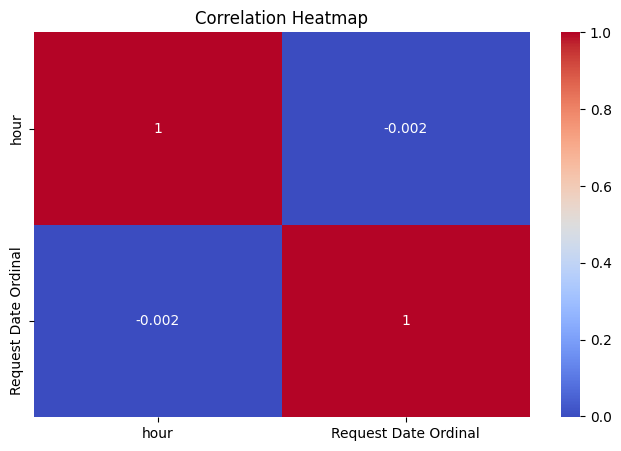

In [ ]:
# Correlation Heatmap visualization code
# Convert Request Date to numeric ordinal format
df['Request Date Ordinal'] = pd.to_datetime(df['Request Date']).map(pd.Timestamp.toordinal)

# Now plot correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df[['hour', 'Request Date Ordinal']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

To examine whether there is a linear relationship (correlation) between the time of day a ride is requested and the specific date it was made. This helps understand if request hour patterns are linked to calendar progression.

##### 2. What is/are the insight(s) found from the chart?

The correlation between hour and Request Date Ordinal is nearly zero (-0.002).

This indicates that requests happen at similar hours across all dates—i.e., there is no meaningful trend in request hours changing over the week.

#### Chart - 8 - Pair Plot

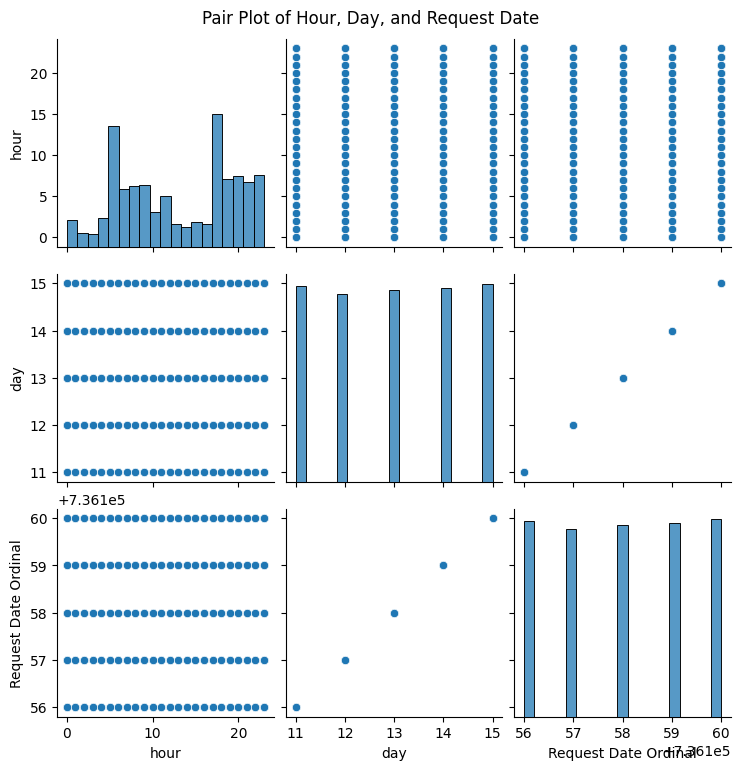

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Convert 'Request Date' to numeric for correlation/pairplot
df['Request Date Ordinal'] = pd.to_datetime(df['Request Date']).map(pd.Timestamp.toordinal)

# Select relevant numeric columns for pairplot
pairplot_cols = ['hour', 'day', 'Request Date Ordinal']

# Plot the pairplot
sns.pairplot(df[pairplot_cols])
plt.suptitle("Pair Plot of Hour, Day, and Request Date", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To explore relationships and distribution patterns among multiple numeric variables (hour, day, request date) simultaneously. It provides both univariate (histogram) and bivariate (scatter) insights.

##### 2. What is/are the insight(s) found from the chart?

Request hours are widely spread from early morning to late night.

Days and dates are evenly distributed—no major concentration on specific values.

No strong linear relationship is observed between any pair of variables.

## **5. Solution to Business Objective**

Incentivize Drivers during rush hours to operate in high-demand zones (e.g., Airport in the morning)

Real-time Demand Prediction models can be used to forecast and match supply dynamically

Introduce Pooling or Scheduling Features to better manage demand surges

Penalty & Reward System to reduce driver cancellations and increase trip completions



#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

***Optimize Driver Deployment During Peak Hours : ***

The data shows that the Morning Rush (5–9 AM) and Evening Rush (5–9 PM) are the periods with the highest demand and most unfulfilled requests. Uber should allocate more drivers specifically during these hours to meet customer demand and reduce “No Cars Available” cases.

**Provide Incentives and Bonuses to Drivers :**

A high number of cancellations and unavailable rides occur during busy periods, especially in the City during evenings. Introducing performance-based incentives or surge bonuses can motivate drivers to accept more requests and stay active during high-demand hours.

***Use Demand Forecasting for Proactive Scheduling : ***

Since the patterns are consistent daily, Uber can implement machine learning models to forecast future demand based on historical data and pre-schedule drivers in those zones ahead of time.

***Improve Driver Retention and Responsiveness : ***

Educate drivers on the importance of not canceling during peak periods and create a penalty and reward system to ensure better reliability.

***Promote Ride Pooling and Pre-Booking Options : ***

Introducing or expanding UberPool during peak hours can help meet more requests with fewer resources. Similarly, encouraging ride scheduling a few hours ahead can help balance supply and demand better.

***Zone-Specific Strategy : ***

At the Airport: Increase vehicle availability in the early morning to avoid "No Cars Available".

In the City: Address the high cancellation rate in the evenings by boosting driver supply and offering cancellation deterrents.

# **Conclusion**

Our analysis highlighted that Uber's peak demand occurs during the Morning Rush (5–9 AM) and Evening Rush (5–9 PM). However, these are also the periods where Uber struggles the most to meet customer demand—either due to driver cancellations (especially in the City) or lack of available vehicles (especially at the Airport). These inefficiencies result in a significant number of unfulfilled ride requests, which can lead to negative customer experiences and loss of business.

The findings also showed that request behavior remains consistent across dates, meaning Uber can rely on historical trends to predict future demand. Our time slot classification and correlation analysis confirmed that hourly ride request patterns do not vary significantly with dates, allowing for more effective demand forecasting.

The visualizations further reinforced these patterns:

Bar plots and time slot analyses showed sharp spikes in unfulfilled rides during peak hours.

Pickup point analysis indicated that service failures differ by location—Airport struggles with availability, while City deals with cancellations.

Scatter plots and pair plots visually represented the lack of driver assignment during crucial periods.

To address these issues, we recommended several strategic solutions, including targeted driver incentives, predictive scheduling, ride-pooling, and zone-specific planning. Implementing these strategies would not only help close the supply-demand gap but also enhance customer satisfaction and operational efficiency.

In conclusion, this project equips Uber with actionable insights that can directly inform business decisions. By leveraging the patterns discovered in this analysis, Uber can significantly improve service reliability, reduce lost revenue opportunities, and strengthen its market position in competitive urban environments.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***